Come esempio applicativo ho deciso di portare un progetto che avevo in mente di realizzare da un pò:
ho scaricato, tramite samsung health, i dati relativi ai passi giornalieri registrati tramite lo smartwatch.
i dati sono forniti sotto forma di csv, ogni riga rappresenta una giornata e tramite il numero di passi (count),
la velocità (speed) e la distanza percorsa (distance), stimeremo le calorie bruciate (calorie).

Importiamo inanzitutto pandas per la lettura del file .csv e leggiamo il file precedentemente scaricato.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/samsunghealth_bighands2304_202206251605/com.samsung.shealth.step_daily_trend.202206251605.csv', ";")

e:\studio\elis\machine learning\.venv\lib\site-packages\IPython\core\interactiveshell.py:3251: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df

,binning_data,update_time,create_time,source_pkg_name,source_type,count,speed,distance,calorie,deviceuuid,pkg_name,datauuid,day_time
0,9cf03a1c-d638-4faa-b759-e2345420975e.binning_d...,2022-04-07 05:45:02.459,2022-04-06 05:46:08.801,com.sec.android.app.shealth,-2,16935,15194901.0,13688429.00,75698004.00,VfS0qUERdZ,com.sec.android.app.shealth,9cf03a1c-d638-4faa-b759-e2345420975e,"1,6492E+12"
1,d1480535-b30e-466e-a184-35b7d2e9f5b8.binning_d...,2022-04-05 22:00:01.377,2022-04-05 22:00:01.377,com.sec.android.app.shealth,0,1927,13485849.0,1491.03,8095999.00,3JD7PDJoKB,com.sec.android.app.shealth,d1480535-b30e-466e-a184-35b7d2e9f5b8,"1,64912E+12"
2,1b5ee2d6-3470-45ea-bcd5-6b855c92a1e2.binning_d...,2022-04-08 05:50:59.278,2022-04-07 05:45:01.836,com.sec.android.app.shealth,-2,8954,13479526.0,6842947.00,36939014.00,VfS0qUERdZ,com.sec.android.app.shealth,1b5ee2d6-3470-45ea-bcd5-6b855c92a1e2,"1,64929E+12"
3,c1cf2832-d2d2-4253-b67f-668c05cde6e4.binning_d...,2022-04-06 22:00:02.100,2022-04-06 22:00:02.100,com.sec.android.app.shealth,0,16680,15208892.0,13502.43,7476099.00,3JD7PDJoKB,com.sec.android.app.shealth,c1cf2832-d2d2-4253-b67f-668c05cde6e4,"1,6492E+12"
4,0cc58a44-77f1-4f46-8112-9acba5ba8448.binning_d...,2022-04-05 21:55:15.755,2022-04-05 09:16:32.831,com.sec.android.app.shealth,-2,1927,13485849.0,1491.03,8095999.00,VfS0qUERdZ,com.sec.android.app.shealth,0cc58a44-77f1-4f46-8112-9acba5ba8448,"1,64912E+12"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,1511e645-3931-4c2d-a751-700c22f38039.binning_d...,2022-06-20 22:00:04.238,2022-06-20 22:00:04.238,com.sec.android.app.shealth,0,9832,13466885.0,75465303.00,39821997.00,3JD7PDJoKB,com.sec.android.app.shealth,1511e645-3931-4c2d-a751-700c22f38039,"1,65568E+12"
235,7e26d6c2-ac3a-4006-bfb3-d0fc8fca71b2.binning_d...,2022-06-21 22:00:02.232,2022-06-21 22:00:02.232,com.sec.android.app.shealth,0,9766,13310779.0,74718604.00,39503998.00,3JD7PDJoKB,com.sec.android.app.shealth,7e26d6c2-ac3a-4006-bfb3-d0fc8fca71b2,"1,65577E+12"
236,1252d98f-a4ab-4121-b0c1-8b28d25c0a69.binning_d...,2022-06-23 22:00:03.640,2022-06-23 22:00:03.640,com.sec.android.app.shealth,0,7552,1346408.0,5789.77,306.18,3JD7PDJoKB,com.sec.android.app.shealth,1252d98f-a4ab-4121-b0c1-8b28d25c0a69,"1,65594E+12"
237,0dd577f3-67c3-42a8-81ec-18eb1e8e5cc7.binning_d...,2022-06-22 22:00:02.716,2022-06-22 22:00:02.716,com.sec.android.app.shealth,0,15158,1524111.0,12440279.00,695.35,3JD7PDJoKB,com.sec.android.app.shealth,0dd577f3-67c3-42a8-81ec-18eb1e8e5cc7,"1,65586E+12"


In [4]:
dataset = df

In [5]:
dataset

,binning_data,update_time,create_time,source_pkg_name,source_type,count,speed,distance,calorie,deviceuuid,pkg_name,datauuid,day_time
0,9cf03a1c-d638-4faa-b759-e2345420975e.binning_d...,2022-04-07 05:45:02.459,2022-04-06 05:46:08.801,com.sec.android.app.shealth,-2,16935,15194901.0,13688429.00,75698004.00,VfS0qUERdZ,com.sec.android.app.shealth,9cf03a1c-d638-4faa-b759-e2345420975e,"1,6492E+12"
1,d1480535-b30e-466e-a184-35b7d2e9f5b8.binning_d...,2022-04-05 22:00:01.377,2022-04-05 22:00:01.377,com.sec.android.app.shealth,0,1927,13485849.0,1491.03,8095999.00,3JD7PDJoKB,com.sec.android.app.shealth,d1480535-b30e-466e-a184-35b7d2e9f5b8,"1,64912E+12"
2,1b5ee2d6-3470-45ea-bcd5-6b855c92a1e2.binning_d...,2022-04-08 05:50:59.278,2022-04-07 05:45:01.836,com.sec.android.app.shealth,-2,8954,13479526.0,6842947.00,36939014.00,VfS0qUERdZ,com.sec.android.app.shealth,1b5ee2d6-3470-45ea-bcd5-6b855c92a1e2,"1,64929E+12"
3,c1cf2832-d2d2-4253-b67f-668c05cde6e4.binning_d...,2022-04-06 22:00:02.100,2022-04-06 22:00:02.100,com.sec.android.app.shealth,0,16680,15208892.0,13502.43,7476099.00,3JD7PDJoKB,com.sec.android.app.shealth,c1cf2832-d2d2-4253-b67f-668c05cde6e4,"1,6492E+12"
4,0cc58a44-77f1-4f46-8112-9acba5ba8448.binning_d...,2022-04-05 21:55:15.755,2022-04-05 09:16:32.831,com.sec.android.app.shealth,-2,1927,13485849.0,1491.03,8095999.00,VfS0qUERdZ,com.sec.android.app.shealth,0cc58a44-77f1-4f46-8112-9acba5ba8448,"1,64912E+12"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,1511e645-3931-4c2d-a751-700c22f38039.binning_d...,2022-06-20 22:00:04.238,2022-06-20 22:00:04.238,com.sec.android.app.shealth,0,9832,13466885.0,75465303.00,39821997.00,3JD7PDJoKB,com.sec.android.app.shealth,1511e645-3931-4c2d-a751-700c22f38039,"1,65568E+12"
235,7e26d6c2-ac3a-4006-bfb3-d0fc8fca71b2.binning_d...,2022-06-21 22:00:02.232,2022-06-21 22:00:02.232,com.sec.android.app.shealth,0,9766,13310779.0,74718604.00,39503998.00,3JD7PDJoKB,com.sec.android.app.shealth,7e26d6c2-ac3a-4006-bfb3-d0fc8fca71b2,"1,65577E+12"
236,1252d98f-a4ab-4121-b0c1-8b28d25c0a69.binning_d...,2022-06-23 22:00:03.640,2022-06-23 22:00:03.640,com.sec.android.app.shealth,0,7552,1346408.0,5789.77,306.18,3JD7PDJoKB,com.sec.android.app.shealth,1252d98f-a4ab-4121-b0c1-8b28d25c0a69,"1,65594E+12"
237,0dd577f3-67c3-42a8-81ec-18eb1e8e5cc7.binning_d...,2022-06-22 22:00:02.716,2022-06-22 22:00:02.716,com.sec.android.app.shealth,0,15158,1524111.0,12440279.00,695.35,3JD7PDJoKB,com.sec.android.app.shealth,0dd577f3-67c3-42a8-81ec-18eb1e8e5cc7,"1,65586E+12"


Ora dividiamo il nostro dataset in dati di input (X, che comprende count,speed e distance) ed il dato che vogliamo prevedere (y, le calorie).

In [6]:
X = dataset[["count", "speed", "distance"]]

In [7]:
X

,count,speed,distance
0,16935,15194901.0,13688429.00
1,1927,13485849.0,1491.03
2,8954,13479526.0,6842947.00
3,16680,15208892.0,13502.43
4,1927,13485849.0,1491.03
...,...,...,...
234,9832,13466885.0,75465303.00
235,9766,13310779.0,74718604.00
236,7552,1346408.0,5789.77
237,15158,1524111.0,12440279.00


In [8]:
y = dataset[["calorie"]]

In [9]:
y

,calorie
0,75698004.00
1,8095999.00
2,36939014.00
3,7476099.00
4,8095999.00
...,...
234,39821997.00
235,39503998.00
236,306.18
237,695.35


Tramite il min-max scaler, ridimensiono il dataset in modo che tutti i valori di input siano più simili possibili tra di loro.

In [10]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

L'ultimo passaggio nell'elaborazione dei dati, consiste nel suddividere il nostro dataset in un set di train, un set di validation e uno di test.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X_scale, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5)

In [13]:
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(167, 3) (36, 3) (36, 3) (167, 1) (36, 1) (36, 1)


Adesso abbiamo sei variabili da poter utilizzare per la predizione divisi nel seguente modo:
    X_train (70% del dataset)
    X_val (15% del dataset)
    X_test (15% del dataset)
    Y_train (70% del dataset)
    Y_val (15% del dataset)
    Y_test (15% del dataset)

Sotto il punto 3 del pdf vi è lo schema della rete neurale che creeremo per stimare le calorie

In [14]:
from keras.models import Sequential
from keras.layers import Dense

Creiamo quindi un modello di tipo sequenziale, con layer di input composto da 3 nodi, 32 nodi per l'hidden layer ed 1 nodo come output.

In [20]:
model = Sequential([
    Dense(32, activation='linear', input_shape=(3,)),
    Dense(1, activation='linear')
])

Prima di passare all'addestramento del modello, specifichiamo il tipo di algoritmo da utilizzare per l'ottimizazione e la funzione di perdita

In [21]:
model.compile(optimizer='adam',
              loss='binary_crossentropy')

Ora passiamo all'addestramento, basta specificare l' "infornata" ed il tempo di addestramento definito in epoche.
Specifichiamo i dati per la convalida X_val e y_val in modo che il modello verifichi punto per punto la progressione dell'addestramento.

In [22]:
hist= model.fit(X_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, y_val))

Epoch 1/100
6/6 [==============================] - 2s 56ms/step - loss: 206946496.0000 - val_loss: 101057816.0000
Epoch 2/100
6/6 [==============================] - 0s 22ms/step - loss: 106223544.0000 - val_loss: 68184232.0000
Epoch 3/100
6/6 [==============================] - 0s 16ms/step - loss: 57268292.0000 - val_loss: 26369918.0000
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 18279562.0000 - val_loss: 7540821.5000
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: 5183681.0000 - val_loss: -3326189.0000
Epoch 6/100
6/6 [==============================] - 0s 16ms/step - loss: -11028276.0000 - val_loss: -17238920.0000
Epoch 7/100
6/6 [==============================] - 0s 12ms/step - loss: -39239340.0000 - val_loss: -59288592.0000
Epoch 8/100
6/6 [==============================] - 0s 9ms/step - loss: -80989544.0000 - val_loss: -82631928.0000
Epoch 9/100
6/6 [==============================] - 0s 9ms/step - loss: -121760224.0000 - val_loss: 

Infine vogliamo visualizzare il training loss ed il validation loss e lo facciamo con un plot

In [23]:
import matplotlib.pyplot as plt

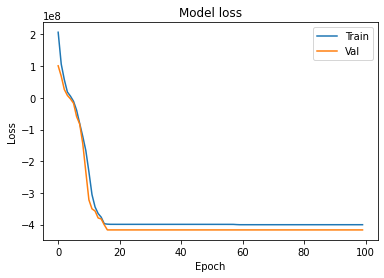

In [24]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Come possiamo vedere dal plot i dati di train sembrano ben abbinati a quelli di validation.